In [23]:
import sys  
import fst
import random
reload(sys)  
sys.setdefaultencoding('utf8')



In [12]:
import random
def ran_lab_prob():
    r = [random.random() for i in range(138)]
    s = sum(r)
    return [i/s for i in r]


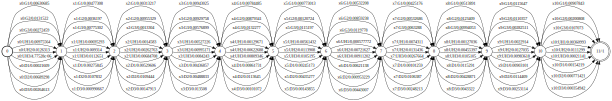

In [13]:
import math
import fst
import random
t = fst.Transducer()
sym=fst.SymbolTable()
#10 timesteps
#138 labels 
#for i in range(138):
x=0
for j in range(11):
    label_prob = ran_lab_prob()
    labels = ['x','x','x','x','x','x','x','x','x']
    symbols = ['G1','G2','G3','UH1','UH2','UH3','D1','D2','D3']
    #labels=[i for i in range(138)]
    for i in range(9):
        prob =  label_prob[i] #"%.4f" %
        t.add_arc(0+x, 1+x,str(labels[i]+str(j)),symbols[i],prob)
    x+=1
t[11].final = -1
t


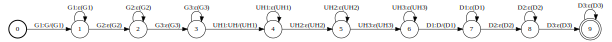

In [24]:
t2=fst.Transducer()
#3x3 states for this example


symbols = ['G1','G2','G3','UH1','UH2','UH3','D1','D2','D3']
labels  = ['G','UH','D']
x=0
count=0
for i in range(1,10):
    if i%3==1:
        t2.add_arc(0+x,1+x,symbols[x],str(labels[count]+"/"+"("+symbols[x]+")"))
    else:
        t2.add_arc(0+x,1+x,symbols[x],str(sym.find(0)+"("+symbols[x]+")"))
    t2.add_arc(1+x,1+x,symbols[x],str(sym.find(0)+"("+symbols[x]+")"))
    print "i",i
    if i%3==0:
        count+=1
    x+=1
    
t2[9].final=True
t2


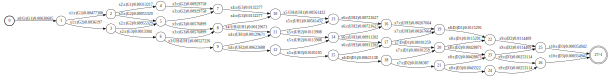

In [25]:
t3 = t>>t2
t3.write("fst.bin")
t3.isyms.write("fst.isysm.bin")
t3.osyms.write("fst.osysm.bin")

t3

In [1]:
import fst
t3 = fst.read("fst.bin")
t3.isyms=fst.read_symbols("fst.isysm.bin")
t3.osyms=fst.read_symbols("fst.osysm.bin")

Best path using api

In [10]:
t= t3.shortest_path()
t

In [2]:
#make parents dict
parents={}
for state in t3.states:
    for arc in state.arcs:
        if arc.nextstate in parents:
            parents[arc.nextstate].append(state.stateid)
        else:
            parents[arc.nextstate]=[state.stateid]
print parents

{1: [0], 2: [1], 3: [1], 4: [2], 5: [2, 3], 6: [3], 7: [4, 5], 8: [5, 6], 9: [6], 10: [7, 8], 11: [8, 9], 12: [9], 13: [10, 11], 14: [11, 12], 15: [12], 16: [13, 14], 17: [14, 15], 18: [15], 19: [16, 17], 20: [17, 18], 21: [18], 22: [19, 20], 23: [20, 21], 24: [21], 25: [22, 23], 26: [23, 24], 27: [25, 26]}


#ignore
t=t3
for state in t.states:
    for arc in state.arcs:
        print state.stateid,arc.nextstate,\
        t.isyms.find(arc.ilabel),\
        t.osyms.find(arc.olabel),arc.weight

In [5]:
#forward pass
import math
graph=t3
scores ={0:1}

def get_key(value):
    for i in range(len(scores)):
        if scores[i]==value:
            return i
def get_max_par(parents):
    if len(parents)!=1:
        if scores[parents[0]] < scores[parents[1]]:
            return parents[1]
        else:
            return parents[0]
    else:
        return parents[0]
    
bestparent={}
bestparent_sym={}
for state in graph.states:
    if state.stateid==0:
        #print "zero",state.stateid
        continue
    else:
        curr_state  = state
        Parents = parents[curr_state.stateid]
        max_par = get_max_par(Parents)
        t = graph[max_par]
        weight=0
        isym=0
        osym=0
        for arc in t.arcs:
            if graph[arc.nextstate].stateid == curr_state.stateid:
                weight=arc.weight
                isym=graph.isyms.find(arc.ilabel)
                osym=graph.osyms.find(arc.olabel)
                #print osym
        #print "curr_state",curr_state.stateid
        #print Parents
        #print "max_par",max_par
        #print "weight",weight
        #print scores[max_par]
        scores[curr_state.stateid]=scores[max_par]+math.log(weight)
        bestparent[curr_state.stateid]=max_par
        bestparent_sym[curr_state.stateid]=osym
print scores
print bestparent
#print bestparent_sym

{0: 1, 1: -4.066118509794508, 2: -9.410882404634219, 3: -9.687483483307503, 4: -15.176910269363411, 5: -14.061751698790186, 6: -16.309761474358496, 7: -18.73975267707622, 8: -19.217009446609726, 9: -21.555058447304656, 10: -23.065191652712755, 11: -25.864938126659723, 12: -26.633938843335507, 13: -28.247626321872065, 14: -30.33988546149342, 15: -31.18846805878842, 16: -33.17904319703288, 17: -35.03804652129908, 18: -36.269839943028614, 19: -39.10223700518173, 20: -41.93329164487483, 21: -40.81310009001188, 22: -43.565116545069095, 23: -46.264868902396245, 24: -46.254780696216386, 25: -48.03567455147911, 26: -52.23386806877138, 27: -55.97922983261765}
{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 5, 8: 5, 9: 6, 10: 7, 11: 8, 12: 9, 13: 10, 14: 11, 15: 12, 16: 13, 17: 14, 18: 15, 19: 16, 20: 17, 21: 18, 22: 19, 23: 21, 24: 21, 25: 22, 26: 24, 27: 25}


In [6]:
state=0
path=[27]
alphas=[]
i=27
while i!=0:
    state=bestparent[i]
    i=state
    path.append(state)
print path
alphas=[scores[p] for p in path]
print alphas

[27, 25, 22, 19, 16, 13, 10, 7, 5, 2, 1, 0]
[-55.97922983261765, -48.03567455147911, -43.565116545069095, -39.10223700518173, -33.17904319703288, -28.247626321872065, -23.065191652712755, -18.73975267707622, -14.061751698790186, -9.410882404634219, -4.066118509794508, 1]


In [7]:
#backward pass
bestpath_symbol={}
bestpath_score={}
bestpath_symbol[27]=bestparent_sym[27].encode("utf-8").replace("\xce\xb5","EPS")
bestpath_score[27]=scores[27]
#print bestpath_symbol
for i in reversed(range(1,27)):
    bestpath_symbol[i]=bestparent_sym[i].encode("utf-8").replace("\xce\xb5","EPS")
    bestpath_score[i]=scores[i]
for symb in bestpath_symbol:
    print bestpath_symbol[symb]
#print bestpath_score

G/(G1)
EPS(G1)
EPS(G2)
EPS(G1)
EPS(G2)
EPS(G3)
EPS(G2)
EPS(G3)
UH/(UH1)
EPS(G3)
UH/(UH1)
EPS(UH2)
UH/(UH1)
EPS(UH2)
EPS(UH3)
EPS(UH2)
EPS(UH3)
D/(D1)
EPS(UH3)
D/(D1)
EPS(D2)
D/(D1)
EPS(D2)
EPS(D3)
EPS(D2)
EPS(D3)
EPS(D3)
